# Crypto Sentiment Analysis

---


In [3]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from pathlib import Path
from newsapi import NewsApiClient

import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\bradl\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [4]:
# Read your api key environment variable
load_dotenv("MY_KEYS.env")
api_key = os.getenv("NEWS_API_KEY")
type(api_key)

str

In [5]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [6]:
# Fetch the latest Bitcoin news articles - the last 100 articles from the last three days were selected for analysis because any more than that requires a paid plan with NewsAPI
btc_news = newsapi.get_everything(
    q="bitcoin",
    language="en",
    from_param="2021-12-17",
    page_size=100
)

print(f"Total articles about Bitcoin: {btc_news['totalResults']}")

Total articles about Bitcoin: 1317


In [7]:
# Fetch the latest Ethereum news articles - the last 100 articles from the last three days were selected for analysis because any more than that requires a paid plan with NewsAPI
eth_news = newsapi.get_everything(
    q="ethereum",
    language="en",
    from_param="2021-12-17",
    page_size=100
)

print(f"Total articles about Ethereum: {eth_news['totalResults']}")

Total articles about Ethereum: 561


In [8]:
# Create a new empty list and function to pull the Bitcoin sentiment scores
btc_sentiments = []

for article in btc_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create Bitcoin sentiments DataFrame
btc_sentiments_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_sentiments_df = btc_sentiments_df[cols]

# Preview the Bitcoin sentiments DataFrame
btc_sentiments_df.head()

,date,text,compound,positive,negative,neutral
0,2021-12-17,"MEXICO CITY, Dec 17 (Reuters) - Mexico's Grupo...",0.7906,0.211,0.0,0.789
1,2021-12-23,Latin America is fast becoming the worlds mode...,0.0000,0.000,0.0,1.000
2,2021-12-17,The news: US-based crypto technology firm NYDI...,0.0000,0.000,0.0,1.000
3,2021-12-20,"Representations of cryptocurrencies Bitcoin, E...",0.0000,0.000,0.0,1.000
4,2021-12-20,"Sen. Cynthia Lummis, a Republican from Wyoming...",0.0000,0.000,0.0,1.000


In [9]:
# Create a new empty list and function to pull the Ethereum sentiment scores
eth_sentiments = []

for article in eth_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create Ethereum sentiments DataFrame
eth_sentiments_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_sentiments_df = eth_sentiments_df[cols]

# Preview the Ethereum sentiments DataFrame
eth_sentiments_df.head()

,date,text,compound,positive,negative,neutral
0,2021-12-20,"Representations of cryptocurrencies Bitcoin, E...",0.0000,0.000,0.000,1.000
1,2021-12-20,"When Ethereum first launched, it wanted to be ...",0.5267,0.132,0.000,0.868
2,2021-12-21,"Web3, the still hazy term for blockchain-based...",0.0000,0.000,0.000,1.000
3,2021-12-21,South Park reveals the truth about NFTs. And i...,0.3818,0.125,0.059,0.816
4,2021-12-17,Do you want to use your cryptocurrency holding...,-0.2176,0.129,0.111,0.760


In [10]:
# Describe the Bitcoin Sentiment
btc_sentiments_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.152852,0.072410,0.036750,0.890810
std,0.405246,0.070266,0.049024,0.079291
min,-0.654200,0.000000,0.000000,0.692000
25%,-0.058000,0.000000,0.000000,0.852000
50%,0.140550,0.071000,0.000000,0.884500
75%,0.498075,0.125000,0.067500,0.938500
max,0.906000,0.291000,0.147000,1.000000


In [11]:
# Describe the Ethereum Sentiment
eth_sentiments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      100 non-null    object 
 1   text      100 non-null    object 
 2   compound  100 non-null    float64
 3   positive  100 non-null    float64
 4   negative  100 non-null    float64
 5   neutral   100 non-null    float64
dtypes: float64(4), object(2)
memory usage: 4.8+ KB


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had the higher positive score on average than Bitcoin for the latest 100 news articles.

Q: Which coin had the highest compound score?

A: Ethereum also had not only the higher compound score on average than Bitcoin, but Ethereum also had the highest overall compound score for the latest 100 news articles. 

Q. Which coin had the highest positive score?

A: Ethereum had the highest overall positive score than Bitcoin for the latest 100 news articles.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [12]:
# Initial imports
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [111]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Add stopwords to the default list
sw_addon = {"Reuters", "Getty Images", "Getty", "AP"}
print(sw.union(sw_addon))

{"wouldn't", 'Getty', 'down', 'few', 'which', 'just', 'd', "shouldn't", 'over', 'because', 'we', "weren't", 'those', 'doing', 't', 'now', 'ourselves', 'an', 'above', 'AP', 'is', 'some', 'whom', 'the', 'at', 'here', 'being', "she's", 'wouldn', 'too', 'of', 'but', 'under', 'hasn', "should've", 'shan', 'her', "it's", 'i', 'our', 'these', 'until', 'do', "doesn't", 'are', 'doesn', 'to', 'yours', 'hadn', 'don', "hadn't", 'by', 'in', 'my', 're', 'both', 'y', "didn't", 'its', "you've", 'when', 'been', 'wasn', 'me', 'then', 'how', 'he', 'for', 'their', 'or', 'itself', "wasn't", 'as', 'most', 'haven', 'won', 'Getty Images', 'such', 'out', 'who', 'all', 'it', 'didn', 'yourself', 'needn', 'only', 'has', 'having', 'him', 'were', 'had', 'them', 'ours', 'again', 'and', 'same', 'll', 'from', "that'll", 'against', 'm', "you'll", 'than', 'your', 'why', 'below', 'ain', 'more', 'yourselves', 'a', 'shouldn', 'up', 'couldn', "haven't", 's', 'that', "mustn't", 'once', 'during', "won't", 'did', 'what', 'hers'

In [112]:
# Create the tokenizer function, and combine the tokens into a string (i.e., no list seprated by quotes) at the end
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)   

    # Create a tokenized list of the words
    words = word_tokenize(re_clean)    
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    #output = [word.lower() for word in lem if word.lower() not in sw]    
    lower = [word.lower() for word in lem]
    
    # Remove the stop words
    tokens = [word for word in lower if word not in sw]
    
    return ' '.join(tokens)

In [113]:
# Create a list of numbers to iterate through to tokenize each of the 100 articles
article_range = [i for i in range(0,100)]

In [114]:
# Create corpus to store all the texts from the articles
btc_corpus = [btc_sentiments_df["text"][r] for r in article_range]
eth_corpus = [eth_sentiments_df["text"][r] for r in article_range]

In [115]:
# Tokenize the corpus using hte tokenizer function for the Bitcoin articles, but first need to process the compiled text by combining it based on the quotes for each article
btc_big_string = ' '.join(btc_corpus)
btc_tokenized = tokenizer(btc_big_string)
print(btc_tokenized)

mexico city dec reuters mexicos grupo elektra accept bitcoin payment purchase latest retailer latin america embrace cryptocurrency grows popularityele char latin america fast becoming world model cryptocurrency permeate daily life citizen year come head turned towards el salvador toward co char newsusbased crypto technology firmnydig netted billion fundingto drive global missionmaking bitcoin accessible consumer institutional client partnersinsider char representations cryptocurrencies bitcoin ethereum dogecoin ripple litecoin placed pc motherboard illustration taken june reutersdado ruvicfile photodubai dec char sen cynthia lummis republican wyomingstefani reynoldspool via reuterscynthia lummis pat toomey two us senator invested cryptocurrencies according report char turkish lira billschris mcgrathgetty images europeas turkish lira plummet cryptocurrency trading surgingthe tally turkeys crypto trade ha soared million per day leve char spencer plattgetty imagesullius stock fell friday 

In [116]:
# Tokenize the corpus using hte tokenizer function for the Ethereum articles, but first need to process the compiled text by combining it based on the quotes for each article
eth_big_string = ' '.join(eth_corpus)
eth_tokenized = tokenizer(eth_big_string)

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [117]:
from collections import Counter
from nltk import ngrams

In [118]:
# Generate the Bitcoin N-grams where N=2
btc_bigram_counts = Counter(ngrams(btc_tokenized, n=2))
print(dict(btc_bigram_counts))

{('m', 'e'): 81, ('e', 'x'): 23, ('x', 'i'): 8, ('i', 'c'): 73, ('c', 'o'): 130, ('o', ' '): 48, (' ', 'c'): 279, ('c', 'i'): 29, ('i', 't'): 80, ('t', 'y'): 22, ('y', ' '): 199, (' ', 'd'): 145, ('d', 'e'): 98, ('e', 'c'): 92, ('c', ' '): 63, (' ', 'r'): 126, ('r', 'e'): 250, ('e', 'u'): 42, ('u', 't'): 56, ('t', 'e'): 152, ('e', 'r'): 210, ('r', 's'): 63, ('s', ' '): 171, (' ', 'm'): 105, ('o', 's'): 48, (' ', 'g'): 36, ('g', 'r'): 13, ('r', 'u'): 19, ('u', 'p'): 7, ('p', 'o'): 31, (' ', 'e'): 87, ('e', 'l'): 48, ('l', 'e'): 58, ('e', 'k'): 9, ('k', 't'): 1, ('t', 'r'): 76, ('r', 'a'): 96, ('a', ' '): 63, (' ', 'a'): 100, ('a', 'c'): 53, ('c', 'c'): 16, ('c', 'e'): 86, ('e', 'p'): 21, ('p', 't'): 38, ('t', ' '): 173, (' ', 'b'): 95, ('b', 'i'): 30, ('t', 'c'): 30, ('o', 'i'): 31, ('i', 'n'): 241, ('n', ' '): 147, (' ', 'p'): 117, ('p', 'a'): 40, ('a', 'y'): 68, ('y', 'm'): 3, ('e', 'n'): 150, ('n', 't'): 105, ('p', 'u'): 12, ('u', 'r'): 79, ('r', 'c'): 14, ('c', 'h'): 161, ('h', 'a')

In [119]:
# Generate the Ethereum N-grams where N=2
eth_bigram_counts = Counter(ngrams(eth_tokenized, n=2))
print(dict(eth_bigram_counts))

{('r', 'e'): 236, ('e', 'p'): 22, ('p', 'r'): 41, ('e', 's'): 113, ('s', 'e'): 100, ('e', 'n'): 198, ('n', 't'): 122, ('t', 'a'): 53, ('a', 't'): 73, ('t', 'i'): 89, ('i', 'o'): 58, ('o', 'n'): 141, ('n', 's'): 21, ('s', ' '): 113, (' ', 'c'): 310, ('c', 'r'): 125, ('r', 'y'): 121, ('y', 'p'): 104, ('p', 't'): 109, ('t', 'o'): 176, ('o', 'c'): 91, ('c', 'u'): 67, ('u', 'r'): 100, ('r', 'r'): 70, ('n', 'c'): 107, ('c', 'i'): 31, ('i', 'e'): 36, (' ', 'b'): 102, ('b', 'i'): 35, ('i', 't'): 93, ('t', 'c'): 27, ('c', 'o'): 128, ('o', 'i'): 46, ('i', 'n'): 284, ('n', ' '): 152, (' ', 'e'): 97, ('e', 't'): 119, ('t', 'h'): 97, ('h', 'e'): 90, ('e', 'r'): 217, ('e', 'u'): 33, ('u', 'm'): 34, ('m', ' '): 42, (' ', 'd'): 107, ('d', 'o'): 31, ('o', 'g'): 10, ('g', 'e'): 61, ('e', 'c'): 88, (' ', 'r'): 68, ('r', 'i'): 62, ('i', 'p'): 8, ('p', 'p'): 31, ('p', 'l'): 27, ('l', 'e'): 73, ('e', ' '): 265, (' ', 'l'): 69, ('l', 'i'): 86, ('t', 'e'): 131, (' ', 'p'): 110, ('l', 'a'): 68, ('a', 'c'): 41,

In [120]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N):
    """Returns the top N tokens from the frequency count"""    
    return Counter(tokens).most_common(N)

In [121]:
# Use token_count to get the top 10 words for Bitcoin
dict(token_count(btc_tokenized, N=10))

{' ': 2022,
 'e': 1501,
 'r': 1131,
 'a': 1049,
 't': 877,
 'o': 841,
 'n': 841,
 'i': 829,
 's': 779,
 'c': 727}

In [122]:
# Use token_count to get the top 10 words for Ethereum
dict(token_count(eth_tokenized, N=10))

{' ': 1953,
 'e': 1556,
 'r': 1128,
 'a': 1047,
 't': 987,
 'n': 920,
 'i': 856,
 'o': 836,
 'c': 813,
 's': 617}

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [123]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

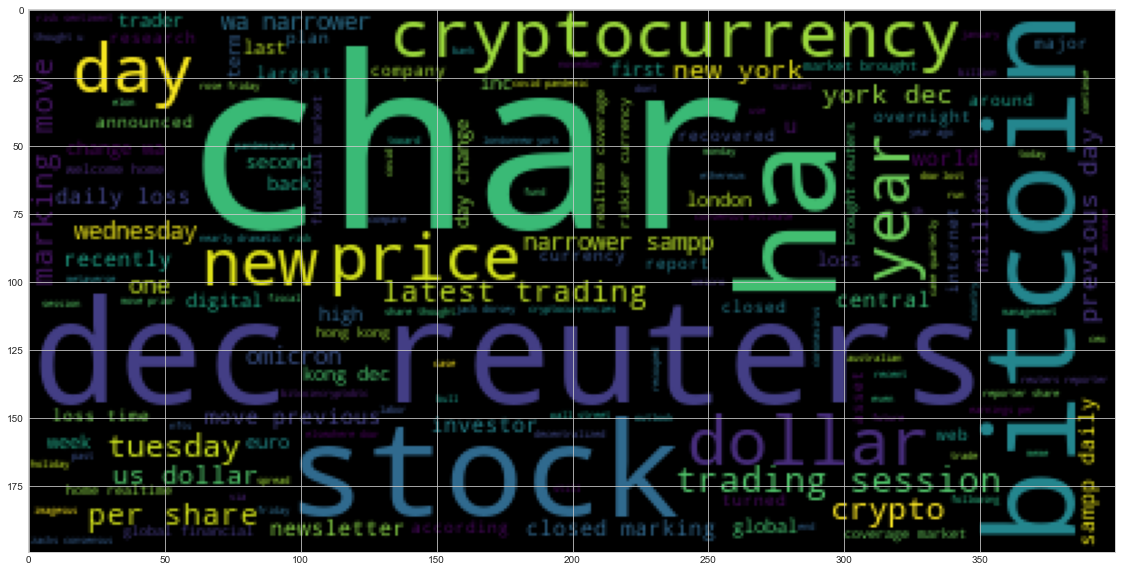

In [124]:
# Generate the Bitcoin word cloud
btc_wc = WordCloud().generate(btc_tokenized)
plt.imshow(btc_wc)

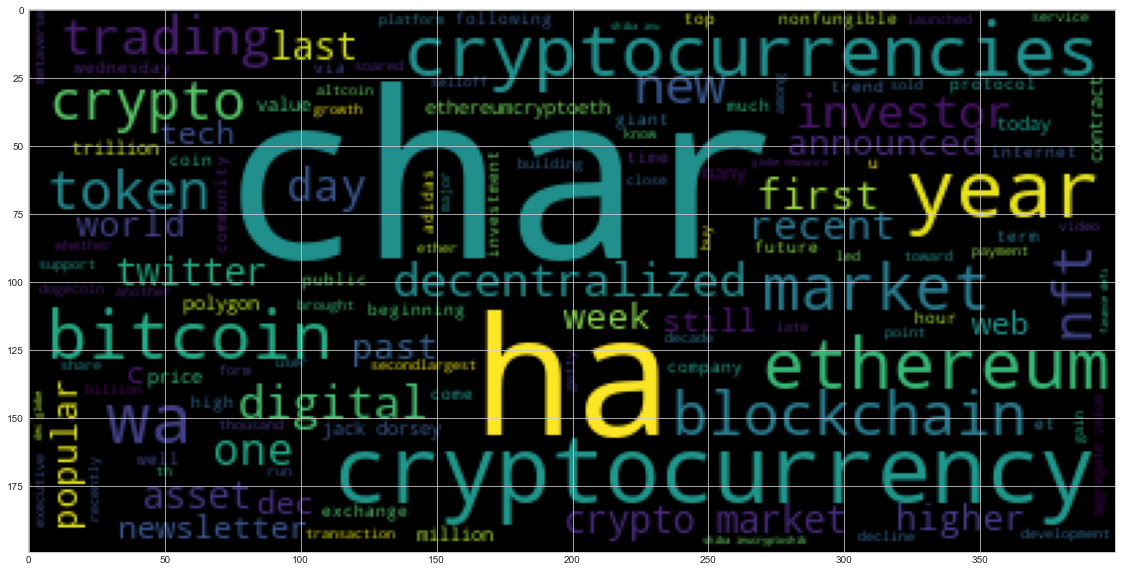

In [125]:
# Generate the Ethereum word cloud
eth_wc = WordCloud().generate(eth_tokenized)
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [126]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!

In [28]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [29]:
# Render the visualization
# YOUR CODE HERE!

In [30]:
# List all Entities
# YOUR CODE HERE!

---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!

In [32]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [33]:
# Render the visualization
# YOUR CODE HERE!

In [34]:
# List all Entities
# YOUR CODE HERE!

---